## Przykłady równań w fizyce matematycznej

W fizyce matematycznej istnieje wiele kluczowych równań, które opisują różnorodne zjawiska fizyczne. Poniżej przedstawiono trzy fundamentalne równania wraz z krótkim omówieniem ich znaczenia i zastosowań.

### 1. Równanie falowe

Równanie falowe opisuje propagację fal w różnych ośrodkach. Jego najbardziej ogólna forma w trzech wymiarach to:

$$\nabla^2 u - \frac{1}{c^2} \frac{\partial^2 u}{\partial t^2} = 0$$

gdzie \(u\) to amplituda fali, \(c\) to prędkość fali w ośrodku, a \(\nabla^2\) to operator Laplace'a. Równanie to ma zastosowanie do fal dźwiękowych, fal elektromagnetycznych, a nawet do niektórych rodzajów fal w ciałach stałych.

### 2. Równanie ciepła

Równanie ciepła opisuje dystrybucję temperatury w danym ośrodku w czasie. Jest ono kluczowe w termodynamice i mechanice płynów. Ma postać:

$$\frac{\partial u}{\partial t} - \alpha \nabla^2 u = 0$$

gdzie \(u\) to temperatura, \(t\) to czas, a \(\alpha\) to współczynnik dyfuzji termicznej charakterystyczny dla danego ośrodka. Równanie to znajduje zastosowanie w wielu dziedzinach inżynierii, od analizy przewodzenia ciepła po modelowanie procesów chemicznych.

### 3. Równanie Schrödingera

Równanie Schrödingera jest fundamentalnym równaniem mechaniki kwantowej i opisuje, jak zmienia się w czasie stan kwantowy systemu. W formie zależnej od czasu prezentuje się następująco:

$$i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \nabla^2 \psi + V \psi$$

gdzie \(i\) to jednostka urojona, \(\hbar\) to zredukowana stała Plancka, \(m\) to masa cząstki, \(\psi\) to funkcja falowa cząstki, a \(V\) to potencjał energetyczny. Równanie to umożliwia obliczenie prawdopodobieństwa znalezienia cząstki kwantowej w danym stanie lub miejscu.


# Symulacja fali na strunie metodą różnic skończonych

## Parametry symulacji

- Długość struny: $L = 10$
- Prędkość fali: $c = 1$
- Krok przestrzenny: $\Delta x = 0.1$
- Krok czasowy: $\Delta t = 0.005$
- Całkowity czas symulacji: $T = 20$

## Metoda różnic skończonych

Symulacja opiera się na jednowymiarowej, dyskretnej siatce przestrzennej z punktami oddalonymi od siebie o $\Delta x$. W każdym punkcie siatki, obliczane jest przemieszczenie struny $u$ w danym momencie czasu, korzystając z różnic skończonych.

### Warunki początkowe

Na początku symulacji przemieszczenie $u$ jest zdefiniowane jako funkcja Gaussa, skoncentrowana w środku struny:

$$
u = \exp\left(-\frac{(x - L / 2)^2}{0.5}\right)
$$

To reprezentuje początkowe ukształtowanie struny przed rozpoczęciem propagacji fali.

### Warunki brzegowe

Zastosowano warunki brzegowe Dirichleta, ustawiając przemieszczenie na końcach struny na zero ($u[0] = u[-1] = 0$). Oznacza to, że końce struny są nieruchome.

### Obliczenia

W każdym kroku czasowym $\Delta t$, przemieszczenie w każdym punkcie siatki jest aktualizowane zgodnie z równaniem falowym, które jest aproksymowane za pomocą metody różnic skończonych. Wzór używany do aktualizacji $u$ w punkcie $j$ wygląda następująco:

$$
u_{\text{next}}[j] = 2 \cdot u[j] - u_{\text{prev}}[j] + \sigma^2 \cdot (u[j+1] - 2 \cdot u[j] + u[j-1])
$$

gdzie $\sigma = \frac{c \Delta t}{\Delta x}$ to liczba Couranta.

## Animacja

Animacja została stworzona za pomocą biblioteki `matplotlib`, wykorzystując `FuncAnimation` do aktualizacji przemieszczeń struny w czasie i zapisania wyniku jako plik wideo lub GIF.


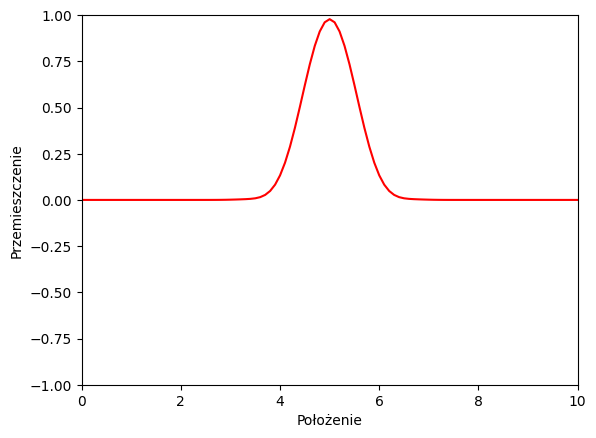

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametry
L = 10          # Długość struny
c = 1           # Prędkość fali
dx = 0.1        # Krok przestrzenny
dt = 0.005      # Krok czasowy
T = 20           # Całkowity czas symulacji

# Stabilność i liczba Couranta
sigma = c * dt / dx

# Siatka przestrzenna i czasowa
x = np.arange(0, L + dx, dx)
N = len(x)

# Warunki początkowe (Gauss)
u = np.exp(-((x - L / 2) ** 2) / 0.5)
u_prev = np.copy(u)  # u w chwili n-1
u_next = np.zeros(N)  # u w chwili n+1

# Inicjalizacja wykresu
fig, ax = plt.subplots()
line, = ax.plot(x, u, 'r-')
ax.set_xlim(0, L)
ax.set_ylim(-1, 1)
ax.set_xlabel('Położenie')
ax.set_ylabel('Przemieszczenie')

# Funkcja aktualizująca w każdym kroku animacji
def update(frame):
    global u, u_prev, u_next
    
    # Zastosowanie warunków brzegowych Dirichleta (u=0 na końcach struny)
    u_next[0] = u_next[-1] = 0
    
    # Równanie falowe rozwiązane metodą różnic skończonych
    for j in range(1, N - 1):
        u_next[j] = 2 * u[j] - u_prev[j] + sigma ** 2 * (u[j + 1] - 2 * u[j] + u[j - 1])
    
    u_prev = np.copy(u)
    u = np.copy(u_next)
    line.set_ydata(u)
    return line,

# Stworzenie animacji
ani = FuncAnimation(fig, update, frames=np.arange(0, T, dt), blit=True)

ani.save('animacja.mp4', writer='ffmpeg', fps=60)



# Równanie ciełpa

Równanie ciepła jest równaniem różniczkowym cząstkowym, które opisuje przepływ ciepła w ośrodku. W jednym wymiarze, równanie to ma postać:

$$\frac{\partial u}{\partial t} = \alpha \frac{\partial^2 u}{\partial x^2}$$


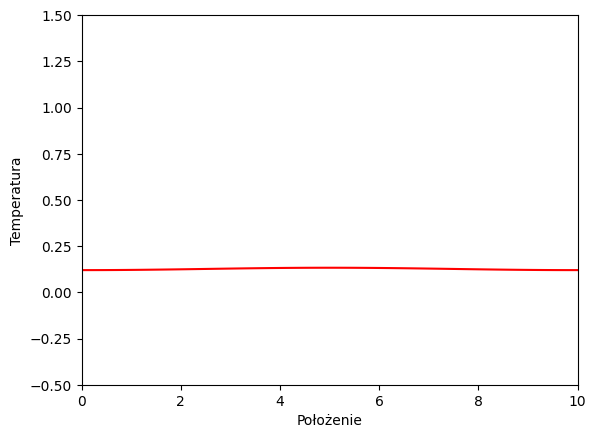

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parametry
L = 10          # Długość obszaru symulacji
alpha = 0.9    # Współczynnik dyfuzji cieplnej
dx = 0.1        # Krok przestrzenny
dt = 0.001      # Krok czasowy
T = 10           # Całkowity czas symulacji

# Warunki stabilności dla równania ciepła
assert alpha * dt / dx**2 < 0.5, "Warunek stabilności nie jest spełniony!"

# Siatka przestrzenna
x = np.arange(0, L + dx, dx)
N = len(x)

# Warunki początkowe (np. Gauss)
u = np.exp(-((x - L / 2) ** 2) / 0.5)
u_next = np.zeros(N)  # u w chwili n+1

# Inicjalizacja wykresu
fig, ax = plt.subplots()
line, = ax.plot(x, u, 'r-')
ax.set_xlim(0, L)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel('Położenie')
ax.set_ylabel('Temperatura')

# Funkcja aktualizująca w każdym kroku animacji
def update(frame):
    global u, u_next
    
    # Równanie ciepła rozwiązane metodą różnic skończonych
    # Zastosowanie warunków brzegowych Neumanna (izolowane końce) przed obliczeniami
    u_next[0] = u[1]  # Przypisanie wartości u[1] do u_next[0] przed obliczeniami
    u_next[-1] = u[-2]  # Analogicznie dla drugiego końca
    
    for j in range(1, N - 1):
        u_next[j] = u[j] + (alpha * dt / dx ** 2) * (u[j + 1] - 2 * u[j] + u[j - 1])
    
    # Aktualizacja warunków brzegowych po obliczeniach
    u_next[0] = u_next[1]  # Ponowne przypisanie wartości dla izolowanych końców, jeśli potrzebne
    u_next[-1] = u_next[-2]
    
    u = np.copy(u_next)
    line.set_ydata(u)
    return line,


# Stworzenie animacji
ani = FuncAnimation(fig, update, frames=np.arange(0, T, dt), blit=True)

# plt.show()
# Aby zapisać animację, odkomentuj poniższą linię
ani.save('animacja_ciepla.mp4', writer='ffmpeg', fps=60)


# Równanie Schrödingera

Równanie Schrödingera jest jednym z najważniejszych równań w mechanice kwantowej, opisującym ewolucję stanu kwantowego układu. W jednym wymiarze, równanie to ma postać:

$$i\hbar \frac{\partial \psi}{\partial t} = -\frac{\hbar^2}{2m} \frac{\partial^2 \psi}{\partial x^2} + V \psi$$

WWW: https://ben.land/post/2022/03/09/quantum-mechanics-simulation/